<h1 style="color:black;">1. Load Dataset</h1>

In [3]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv("Customer-Churn-Records.csv")

In [19]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Complain'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


<h1 style="color:black;">2. Data Overview</h1>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Satisfaction Score  10000 non-null  int64  
 12  Card Type           10000 non-null  object 
 13  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [21]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [22]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,5.000000,1000.000000


In [23]:
df.rename(columns={"Exited": "Churn"}, inplace=True)

<h1 style="color:black;">3. Target Distribution</h1>

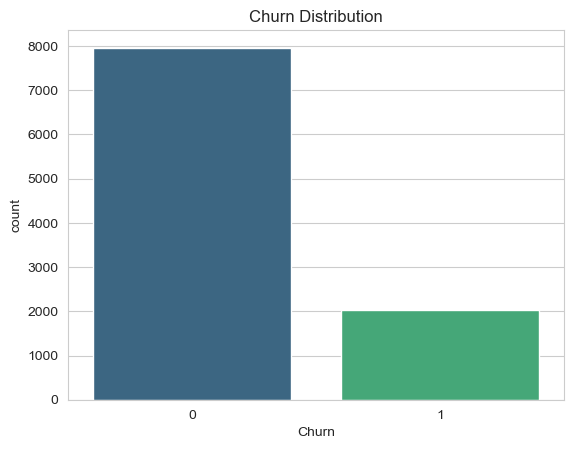

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=df, palette="viridis")
plt.title("Churn Distribution")
plt.show()

<h1 style="color:black;">4. Correlation Matrix</h1>

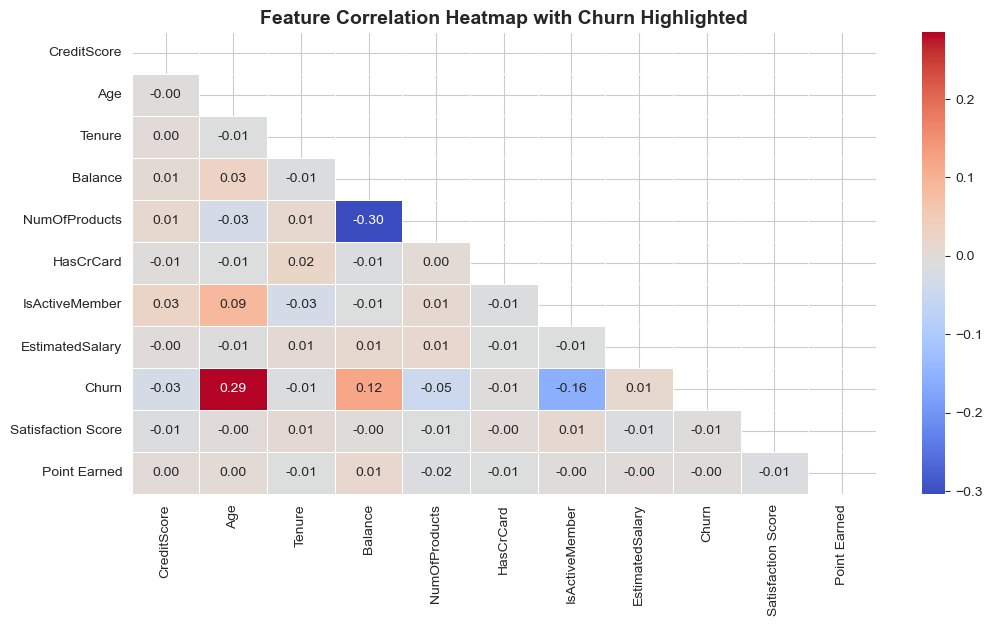

In [28]:
plt.figure(figsize=(12, 6))
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap with Churn Highlighted", fontsize=14, fontweight='bold')
plt.show()

<h1 style="color:black;">5. Feature Distribution</h1>


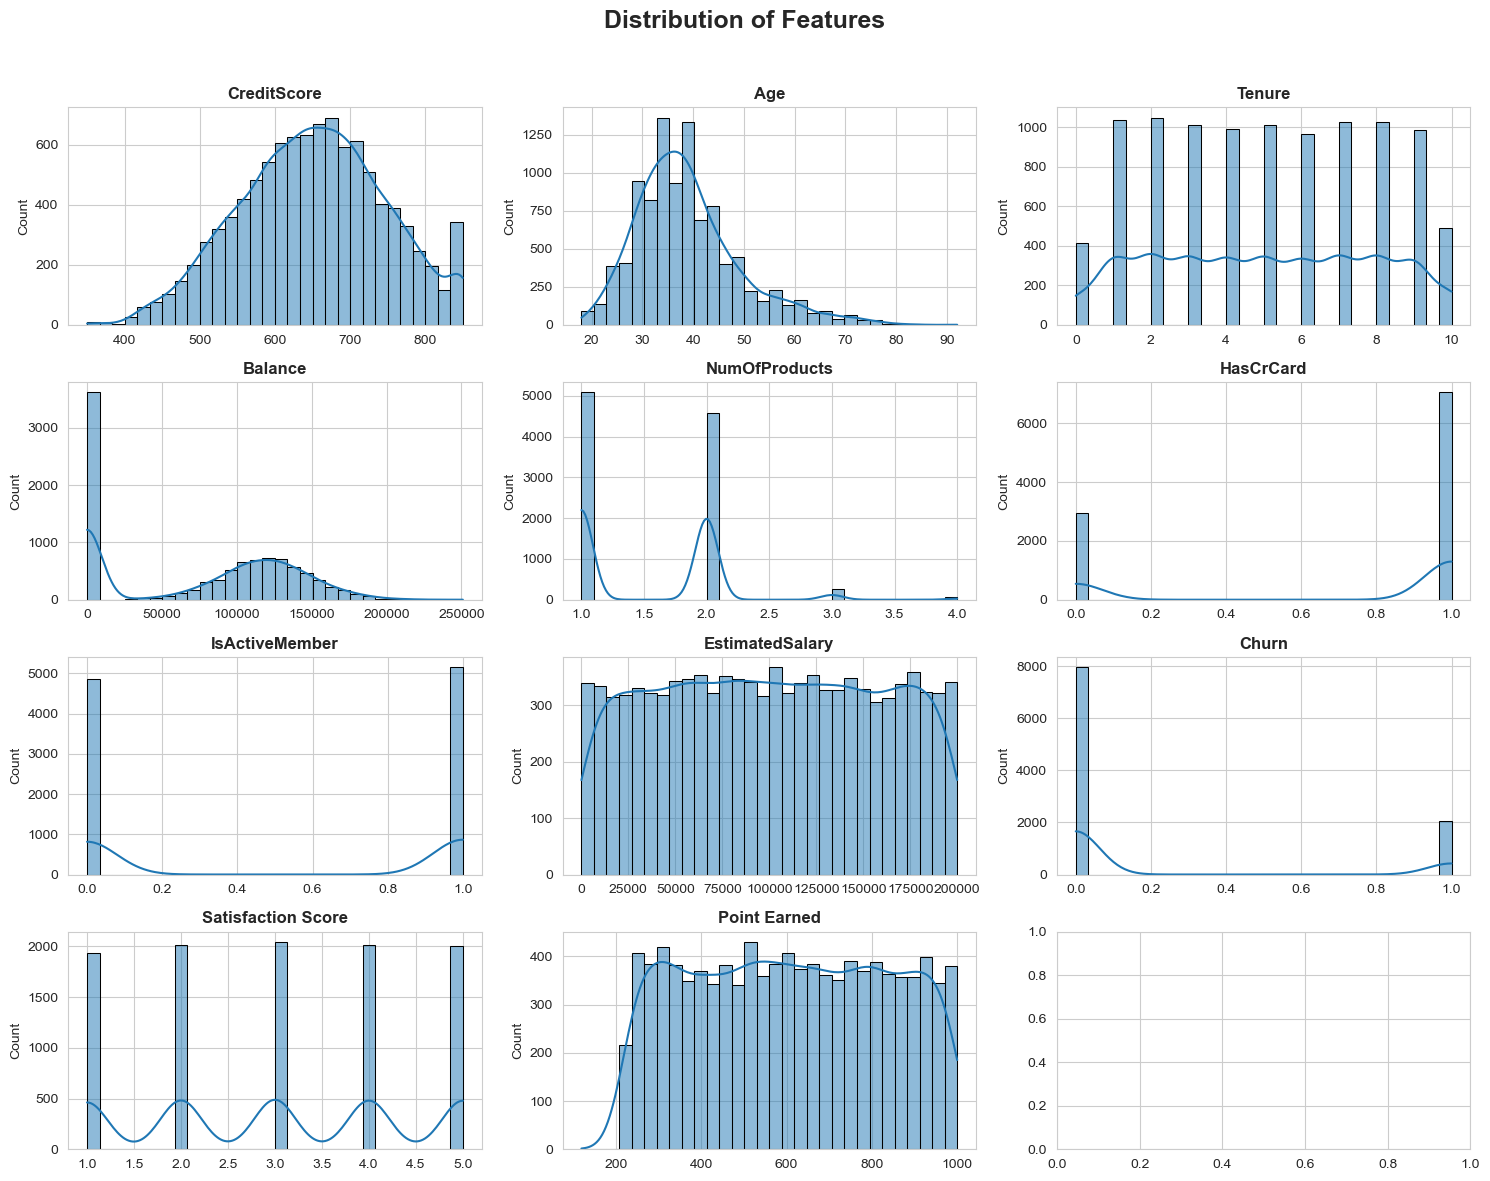

In [29]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
fig.suptitle("Distribution of Features", fontsize=18, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    if i < len(axes):
        sns.histplot(df[col], bins=30, edgecolor="black", kde=True, ax=axes[i])
        axes[i].set_title(col, fontsize=12, fontweight='bold')
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<h1 style="color:black;">6. Churn Rate by Categorical Variables</h1>

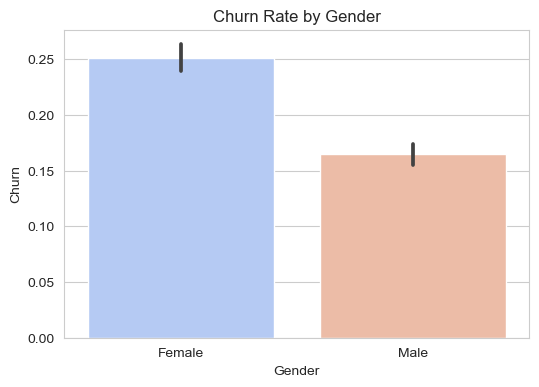

In [30]:
plt.figure(figsize=(6,4))
sns.barplot(x="Gender", y="Churn", data=df, palette="coolwarm")
plt.title("Churn Rate by Gender")
plt.show()

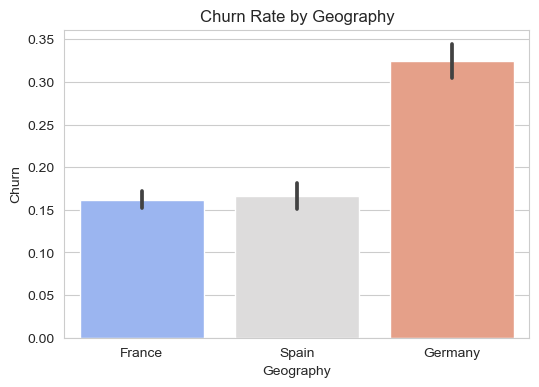

In [34]:
plt.figure(figsize=(6,4))
sns.barplot(x="Geography", y="Churn", data=df, palette="coolwarm")
plt.title("Churn Rate by Geography")
plt.show()

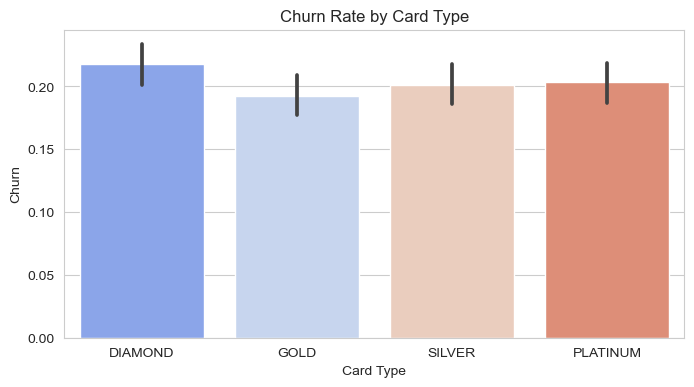

In [35]:
plt.figure(figsize=(8,4))
sns.barplot(x="Card Type", y="Churn", data=df, palette="coolwarm")
plt.title("Churn Rate by Card Type")
plt.show()

<h1 style="color:black;">7. Feature Distributions by Churn Status</h1>

C:\Users\colby\AppData\Local\Temp\ipykernel_23052\3899744066.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Churn"]==0]["Age"], label="Not Churned", shade=True, color="blue")
C:\Users\colby\AppData\Local\Temp\ipykernel_23052\3899744066.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Churn"]==1]["Age"], label="Churned", shade=True, color="red")


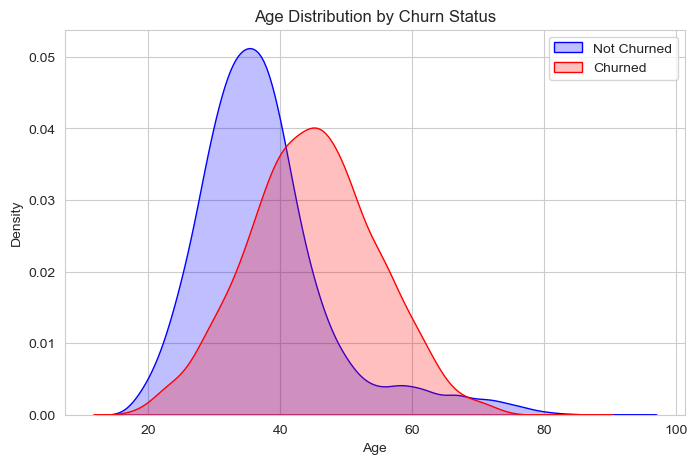

In [36]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df["Churn"]==0]["Age"], label="Not Churned", shade=True, color="blue")
sns.kdeplot(df[df["Churn"]==1]["Age"], label="Churned", shade=True, color="red")
plt.title("Age Distribution by Churn Status")
plt.xlabel("Age")
plt.legend()
plt.show()

C:\Users\colby\AppData\Local\Temp\ipykernel_23052\1654468410.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Churn"] == 0]["EstimatedSalary"], label="Not Churned", shade=True, color="blue")
C:\Users\colby\AppData\Local\Temp\ipykernel_23052\1654468410.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Churn"] == 1]["EstimatedSalary"], label="Churned", shade=True, color="red")


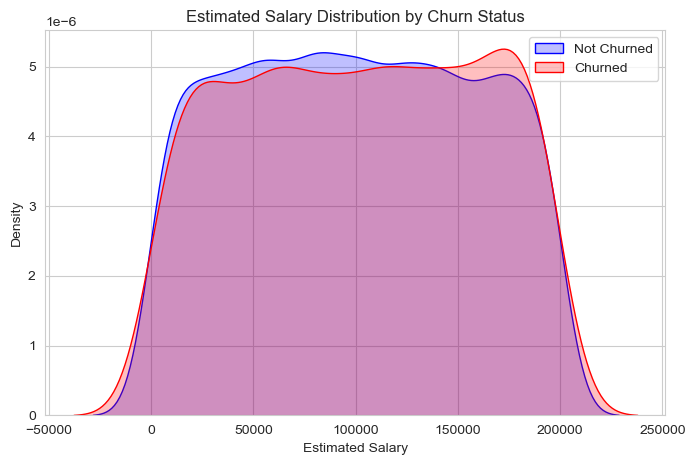

In [39]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df["Churn"] == 0]["EstimatedSalary"], label="Not Churned", shade=True, color="blue")
sns.kdeplot(df[df["Churn"] == 1]["EstimatedSalary"], label="Churned", shade=True, color="red")
plt.title("Estimated Salary Distribution by Churn Status")
plt.xlabel("Estimated Salary")
plt.legend()
plt.show()

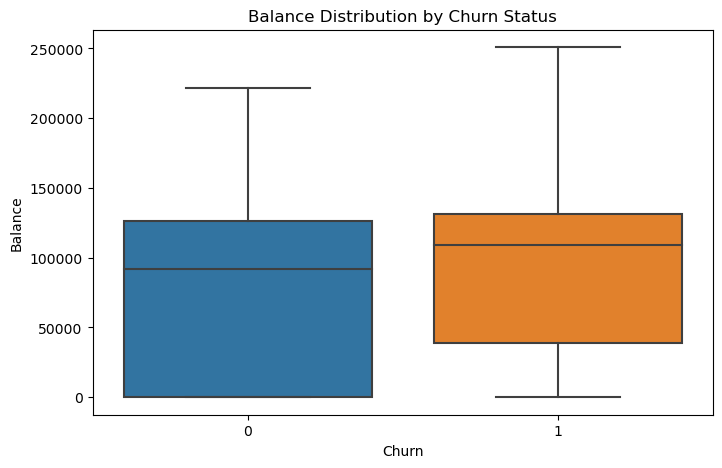

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="Balance", data=df)
plt.title("Balance Distribution by Churn Status")
plt.show()

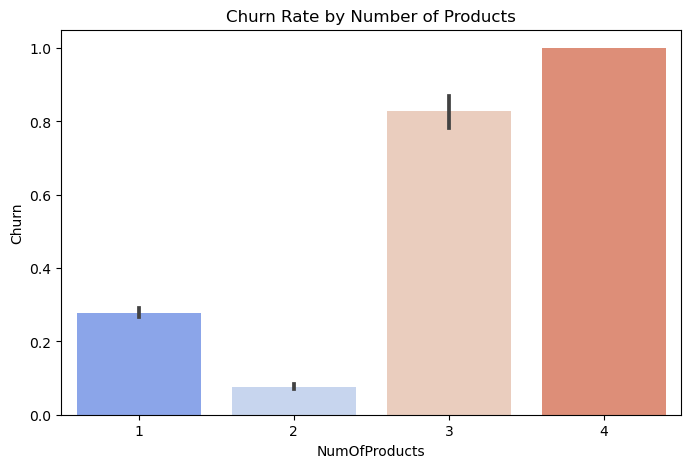

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x="NumOfProducts", y="Churn", data=df, palette="coolwarm")
plt.title("Churn Rate by Number of Products")
plt.show()


<h1 style="color:black;">8. Outliers</h1>


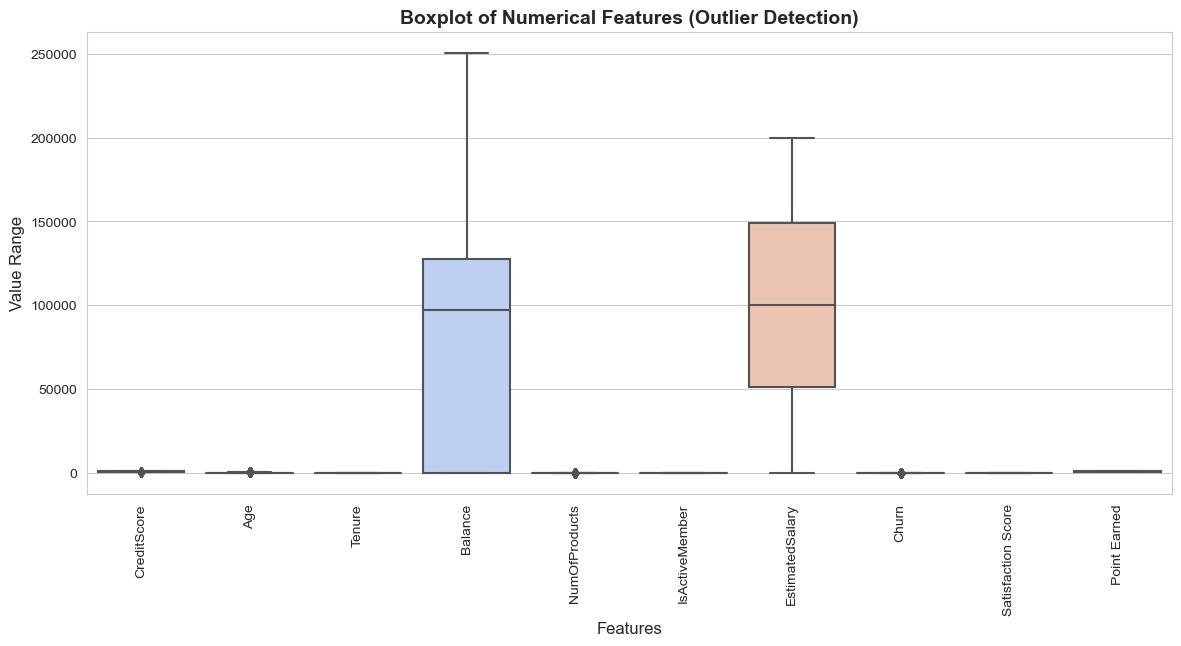

In [42]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop(['HasCrCard'])

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[numeric_columns], palette="coolwarm")
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Boxplot of Numerical Features (Outlier Detection)", fontsize=14, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Value Range", fontsize=12)
plt.show()

In [1]:
import os
print(os.getcwd())


C:\Users\colby\Bank Customer Churn Prediction
